Importing relevant libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sqlite3

In [2]:
box_office_df = pd.read_csv('zippedData/bom.movie_gross.csv')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
rotten_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t')
rotten_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
rotten_info['synopsis'][1]

"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site"

In [5]:
rotten_reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
rotten_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
movieDB = pd.read_csv('zippedData/tmdb.movies.csv')

In [7]:
movieDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
budgetDF = pd.read_csv('zippedData/tn.movie_budgets.csv')

In [9]:
budgetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
rotten_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
path = 'zippedData/im.db'
conn = sqlite3.connect(path)

In [12]:
table = pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """
, conn
)

In [13]:
table

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [14]:
imdbdf = pd.read_sql(
    """
    SELECT *
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
    JOIN movie_akas
        USING(movie_id)

"""
, conn
)
imdbdf

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,Sangharsh,IN,hi,None,alternative transliteration,0.0
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,None,None,original,None,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,IN,None,None,None,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,IN,hi,None,alternative transliteration,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,IN,hi,None,alternative spelling,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,2,Sisterleaf,IN,en,None,literal English title,0.0
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600,3,Pengalila,IN,None,None,None,0.0
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0


In [15]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

In [16]:
imdbdf.dropna(subset=['runtime_minutes'], inplace=True)
imdbdf.drop(['is_original_title', 'attributes', 'types', 'language'], axis = 1, inplace=True)
regions = ['CA', 'US', 'GB', 'AU', 'IE', 'NZ']
imdbdf = imdbdf[imdbdf['region'].isin(regions)]
imdbdf.dropna(subset=['genres'], inplace=True)
imdbdf = imdbdf[imdbdf['numvotes'] >= 50].copy()
imdbdf.drop_duplicates(subset='movie_id', inplace=True)
imdbdf = imdbdf[imdbdf['runtime_minutes'] <= 1300.0 ].copy()
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18922 entries, 10 to 261779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18922 non-null  object 
 1   primary_title    18922 non-null  object 
 2   original_title   18922 non-null  object 
 3   start_year       18922 non-null  int64  
 4   runtime_minutes  18922 non-null  float64
 5   genres           18922 non-null  object 
 6   averagerating    18922 non-null  float64
 7   numvotes         18922 non-null  int64  
 8   ordering         18922 non-null  int64  
 9   title            18922 non-null  object 
 10  region           18922 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


/var/folders/hx/tvtrbmr14xz1cjsvyzz2894h0000gn/T/ipykernel_35797/2568533355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdbdf.dropna(subset=['genres'], inplace=True)


In [17]:

test = imdbdf[imdbdf.duplicated(subset='title')]
test.sort_values(by='title')


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region
29911,tt1517177,3,3,2010,119.0,"Comedy,Drama,Romance",6.7,4722,20,3,US
102856,tt2319739,41,41,2012,80.0,"Drama,Sci-Fi",6.7,979,1,41,AU
226750,tt6085482,7 Minutes,7 minuti,2016,88.0,Drama,6.7,384,4,7 Minutes,US
79488,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,6.6,1519,6,A Better Life,CA
216427,tt5659816,A Midsummer Night's Dream,A Midsummer Night's Dream,2017,105.0,"Comedy,Fantasy",5.4,112,1,A Midsummer Night's Dream,US
...,...,...,...,...,...,...,...,...,...,...,...
96401,tt2241116,White Rabbit,White Rabbit,2013,90.0,Drama,6.1,1110,1,White Rabbit,US
172751,tt4043502,Wichita,Wichita,2016,85.0,"Drama,Horror,Thriller",5.0,73,3,Wichita,US
188221,tt4575576,Christopher Robin,Christopher Robin,2018,104.0,"Adventure,Animation,Comedy",7.3,52737,7,Winnie the Pooh,US
118850,tt2563156,Yellow,Yellow,2013,77.0,"Drama,Horror,Thriller",4.9,76,2,Yellow,US


In [18]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18922 entries, 10 to 261779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18922 non-null  object 
 1   primary_title    18922 non-null  object 
 2   original_title   18922 non-null  object 
 3   start_year       18922 non-null  int64  
 4   runtime_minutes  18922 non-null  float64
 5   genres           18922 non-null  object 
 6   averagerating    18922 non-null  float64
 7   numvotes         18922 non-null  int64  
 8   ordering         18922 non-null  int64  
 9   title            18922 non-null  object 
 10  region           18922 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [19]:
writersdf = pd.read_sql(
    """
    SELECT movie_id, person_id as writer_id, primary_name as writer_name
    FROM writers
    JOIN persons
        USING(person_id)
"""
, conn
)

writersdf['count'] = 1
writersdf

,movie_id,writer_id,writer_name,count
0,tt0285252,nm0899854,Tony Vitale,1
1,tt0438973,nm0175726,Steve Conrad,1
2,tt0438973,nm1802864,Sean Sorensen,1
3,tt0462036,nm1940585,Bill Haley,1
4,tt0835418,nm0310087,Peter Gaulke,1
...,...,...,...,...
255866,tt8999892,nm10122246,Bradley T. Castle,1
255867,tt8999974,nm10122357,Daysi Burbano,1
255868,tt9001390,nm6711477,Bernard Lessa,1
255869,tt9004986,nm4993825,Fredrik Horn Akselsen,1


In [20]:
writersdf.info()
writersdf.duplicated(subset='movie_id').sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255871 entries, 0 to 255870
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_id     255871 non-null  object
 1   writer_id    255871 non-null  object
 2   writer_name  255871 non-null  object
 3   count        255871 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 7.8+ MB


145610

In [21]:
directorsdf = pd.read_sql(
    """
    SELECT movie_id, person_id as director_id, primary_name as director_name
    FROM directors
    JOIN persons
        USING(person_id)
"""
, conn
)
directorsdf['count'] = 1
directorsdf

,movie_id,director_id,director_name,count
0,tt0285252,nm0899854,Tony Vitale,1
1,tt0462036,nm1940585,Bill Haley,1
2,tt0835418,nm0151540,Jay Chandrasekhar,1
3,tt0835418,nm0151540,Jay Chandrasekhar,1
4,tt0878654,nm0089502,Albert Pyun,1
...,...,...,...,...
291166,tt8999974,nm10122357,Daysi Burbano,1
291167,tt9001390,nm6711477,Bernard Lessa,1
291168,tt9001494,nm10123242,Tate Nova,1
291169,tt9001494,nm10123248,Courtney Faye Powell,1


In [22]:
imdbwriters = imdbdf.merge(writersdf, on='movie_id', how='left')
imdbdfdirectors = imdbdf.merge(directorsdf, on='movie_id', how='left')
imdbwriters

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_id,writer_name,count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0000080,Orson Welles,1.0
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0462648,Oja Kodar,1.0
2,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,nm0365480,Anthony Harrison,1.0
3,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,nm0611850,John Mulholland,1.0
4,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,nm0667001,Stuart Paul,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,tt9825006,Avant qu'on explose,Avant qu'on explose,2019,108.0,Comedy,6.9,50,1,Avant qu'on explose,CA,nm4486018,Eric K. Boulianne,1.0
54428,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"Comedy,Drama",5.7,50,2,Mon ami Walid,CA,nm6767387,Adib Alkhalidey,1.0
54429,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,"Comedy,Drama",5.7,50,2,Mon ami Walid,CA,nm8020784,Julien Lacroix,1.0
54430,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50,2,The House Elf,US,NaN,NaN,NaN


In [27]:
#imdbdf_wd = imdbwriters.merge(directorsdf, on='movie_id', how='left')
#imdbdf_wd['wd'] = imdbdf_wd.apply(lambda row: 1 if row['writer_name'] == row['director_name'] else 0, axis=1)
#imdbdf_wd.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,writer_id,writer_name,count_x,director_id,director_name,count_y,wd
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0000080,Orson Welles,1.0,nm0000080,Orson Welles,1.0,1
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0000080,Orson Welles,1.0,nm0000080,Orson Welles,1.0,1
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0462648,Oja Kodar,1.0,nm0000080,Orson Welles,1.0,0
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,nm0462648,Oja Kodar,1.0,nm0000080,Orson Welles,1.0,0
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,nm0365480,Anthony Harrison,1.0,nm0365480,Anthony Harrison,1.0,1


In [28]:
def combine_as_str(series)
    return ', '.join(series)


new_df = imdbdf_wd.groupby('movie_id')['director_name'].agg(combine_as_str).reset_index()
new_df

SyntaxError: invalid syntax (950889209.py, line 1)

In [25]:
imdbdf_wd['director_name'][0:5]

0        Orson Welles
1        Orson Welles
2        Orson Welles
3        Orson Welles
4    Anthony Harrison
Name: director_name, dtype: object

In [26]:
imdbdf_wd['writer_name'][0:5]

0        Orson Welles
1        Orson Welles
2           Oja Kodar
3           Oja Kodar
4    Anthony Harrison
Name: writer_name, dtype: object

In [687]:
imdbdf.duplicated(subset='movie_id').sum()

0

In [688]:
imdbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18922 entries, 10 to 261779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18922 non-null  object 
 1   primary_title    18922 non-null  object 
 2   original_title   18922 non-null  object 
 3   start_year       18922 non-null  int64  
 4   runtime_minutes  18922 non-null  float64
 5   genres           18922 non-null  object 
 6   averagerating    18922 non-null  float64
 7   numvotes         18922 non-null  int64  
 8   ordering         18922 non-null  int64  
 9   title            18922 non-null  object 
 10  region           18922 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [689]:
imdbdf['genres'].value_counts().tail(30)

genres
Biography,Horror                 1
Fantasy,Mystery                  1
Adventure,Sci-Fi,Thriller        1
Documentary,History,Horror       1
Documentary,News,Thriller        1
Action,Crime,Sport               1
Animation,Fantasy,Mystery        1
Documentary,Fantasy,History      1
Drama,Game-Show,Thriller         1
Animation,Fantasy,Horror         1
Documentary,Drama,Western        1
Documentary,Music,War            1
Adventure,Documentary,Romance    1
Documentary,History,Mystery      1
Comedy,Documentary,Thriller      1
Fantasy,Romance,Thriller         1
Adventure,Biography,History      1
Documentary,News,War             1
Animation,Romance,Sci-Fi         1
Family,Horror,Thriller           1
Animation,Biography,History      1
Comedy,Music,Sci-Fi              1
Drama,Fantasy,History            1
Family,Sci-Fi,Thriller           1
Comedy,History,War               1
Animation,Comedy,Music           1
Action,Horror,Sport              1
Drama,History,Mystery            1
Drama,Horror,

In [690]:
# probably not the best way given genres likely isn't in any specific order
imdbdf['primary genre'] = imdbdf['genres'].apply(lambda x: x.split(',')[0])
imdbdf.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,primary genre
10,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US,Drama
31,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,1,Joe Finds Grace,CA,Adventure
49,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US,Documentary
58,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,1,Heaven & Hell,US,Drama
63,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2,Foodfight!,US,Action


In [691]:
#explode genre so duplicated for each genre listed for each movie
df2 = imdbdf
df2['genres'] = df2['genres'].apply(lambda x: x.split(','))
df2 = df2.explode('genres')
df2.drop('primary genre', axis=1, inplace=True)
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region
10,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,US
31,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263,1,Joe Finds Grace,CA
31,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Animation,8.1,263,1,Joe Finds Grace,CA
31,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Comedy,8.1,263,1,Joe Finds Grace,CA
49,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53,3,Cooper and Hemingway: The True Gen,US
...,...,...,...,...,...,...,...,...,...,...,...
261764,tt9866344,Mon Ami Walid,Mon Ami Walid,2019,72.0,Drama,5.7,50,2,Mon ami Walid,CA
261771,tt9875852,The House Elf,Domovoy,2019,90.0,Comedy,5.8,50,2,The House Elf,US
261771,tt9875852,The House Elf,Domovoy,2019,90.0,Family,5.8,50,2,The House Elf,US
261771,tt9875852,The House Elf,Domovoy,2019,90.0,Fantasy,5.8,50,2,The House Elf,US


In [692]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38343 entries, 10 to 261779
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         38343 non-null  object 
 1   primary_title    38343 non-null  object 
 2   original_title   38343 non-null  object 
 3   start_year       38343 non-null  int64  
 4   runtime_minutes  38343 non-null  float64
 5   genres           38343 non-null  object 
 6   averagerating    38343 non-null  float64
 7   numvotes         38343 non-null  int64  
 8   ordering         38343 non-null  int64  
 9   title            38343 non-null  object 
 10  region           38343 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 3.5+ MB


In [693]:
genredf = df2.groupby(by='genres').mean(numeric_only = True)
genredf = genredf.drop(['start_year', 'ordering'], axis=1)
genredf

,runtime_minutes,averagerating,numvotes
genres,,,
Action,100.653924,5.299675,39495.789345
Adult,120.000000,2.000000,128.000000
Adventure,98.245533,5.749636,55002.313700
Animation,87.869565,6.122609,25650.156522
Biography,100.832198,6.951789,17724.193356
Comedy,94.960911,5.757839,14377.508779
Crime,99.026301,5.771628,20941.777840
Documentary,89.271652,7.131244,1162.659178
Drama,99.330158,6.062308,13605.666749


In [694]:
writersratings = imdbwriters.groupby('writer_id').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'count': 'sum'})
writersratings.sort_values(by='averagerating', inplace=True, ascending=False)
writersratings

,runtime_minutes,averagerating,count
writer_id,,,
nm8470073,91.0,9.5,1.0
nm8961211,90.0,9.5,3.0
nm3431093,86.0,9.5,1.0
nm8398404,95.0,9.5,2.0
nm10106074,90.0,9.5,3.0
...,...,...,...
nm3510691,145.0,1.2,1.0
nm2475997,145.0,1.2,1.0
nm3457203,145.0,1.2,1.0


In [695]:
writersratings.sort_values(by='count', ascending=False)
writersratings = writersratings[writersratings['count'] >= 5].copy()
writersratings

,runtime_minutes,averagerating,count
writer_id,,,
nm0517665,66.666667,8.933333,6.0
nm1632985,100.000000,8.300000,5.0
nm0956051,100.000000,8.300000,5.0
nm0115568,100.000000,8.300000,5.0
nm1553346,100.000000,8.300000,5.0
...,...,...,...
nm3102198,98.000000,2.400000,5.0
nm3117093,83.833333,2.016667,6.0
nm1732299,174.500000,1.483333,6.0


In [696]:
writersratings = writersratings.merge(writersdf, on='writer_id', how='left')
writersratings

,writer_id,runtime_minutes,averagerating,count_x,movie_id,writer_name,count_y
0,nm0517665,66.666667,8.933333,6.0,tt2832312,Tom Logan,1
1,nm0517665,66.666667,8.933333,6.0,tt2345573,Tom Logan,1
2,nm0517665,66.666667,8.933333,6.0,tt2175959,Tom Logan,1
3,nm0517665,66.666667,8.933333,6.0,tt2177711,Tom Logan,1
4,nm0517665,66.666667,8.933333,6.0,tt2342065,Tom Logan,1
...,...,...,...,...,...,...,...
25509,nm1448482,79.857143,1.385714,7.0,tt1980134,Brett Kelly,1
25510,nm1448482,79.857143,1.385714,7.0,tt4797490,Brett Kelly,1
25511,nm1448482,79.857143,1.385714,7.0,tt3462616,Brett Kelly,1
25512,nm1448482,79.857143,1.385714,7.0,tt2265453,Brett Kelly,1


In [697]:
writersratings = writersratings.drop(['movie_id', 'count_y'], axis=1)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm0517665,66.666667,8.933333,6.0,Tom Logan
1,nm0517665,66.666667,8.933333,6.0,Tom Logan
2,nm0517665,66.666667,8.933333,6.0,Tom Logan
3,nm0517665,66.666667,8.933333,6.0,Tom Logan
4,nm0517665,66.666667,8.933333,6.0,Tom Logan
...,...,...,...,...,...
25509,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25510,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25511,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25512,nm1448482,79.857143,1.385714,7.0,Brett Kelly


In [698]:
writersratings.sort_values(by='averagerating', inplace=True, ascending=False)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm0517665,66.666667,8.933333,6.0,Tom Logan
2,nm0517665,66.666667,8.933333,6.0,Tom Logan
3,nm0517665,66.666667,8.933333,6.0,Tom Logan
4,nm0517665,66.666667,8.933333,6.0,Tom Logan
5,nm0517665,66.666667,8.933333,6.0,Tom Logan
...,...,...,...,...,...
25509,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25510,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25511,nm1448482,79.857143,1.385714,7.0,Brett Kelly
25512,nm1448482,79.857143,1.385714,7.0,Brett Kelly


In [699]:
writersratings.drop_duplicates(subset='writer_id', inplace=True)
writersratings

,writer_id,runtime_minutes,averagerating,count_x,writer_name
0,nm0517665,66.666667,8.933333,6.0,Tom Logan
23,nm1553346,100.000000,8.300000,5.0,Scott Gaffney
20,nm0115568,100.000000,8.300000,5.0,Rob Bruce
15,nm0956051,100.000000,8.300000,5.0,David Zieff
12,nm1632985,100.000000,8.300000,5.0,Steve Winter
...,...,...,...,...,...
25469,nm2778196,98.000000,2.400000,5.0,Marv Blauvelt
25485,nm3117093,83.833333,2.016667,6.0,Keith Parker
25489,nm1732299,174.500000,1.483333,6.0,Tony Watt
25501,nm2784796,79.700000,1.390000,10.0,Trevor Payer


In [700]:
directorsratings = imdbdfdirectors.groupby('director_id').agg({'runtime_minutes': 'mean', 'averagerating': 'mean', 'count': 'sum'})
directorsratings.sort_values(by='averagerating', inplace=True)
directorsratings

,runtime_minutes,averagerating,count
director_id,,,
nm3819164,143.0,1.0,1.0
nm2764740,143.0,1.0,1.0
nm3786281,143.0,1.0,1.0
nm3897893,143.0,1.0,1.0
nm3866368,143.0,1.0,1.0
...,...,...,...
nm8398404,95.0,9.5,1.0
nm8961212,90.0,9.5,3.0
nm8961211,90.0,9.5,3.0


In [701]:
directorsratings = directorsratings.merge(directorsdf, on='director_id', how='left')
directorsratings

,director_id,runtime_minutes,averagerating,count_x,movie_id,director_name,count_y
0,nm3819164,143.0,1.0,1.0,tt1926214,Nicola Barbour,1
1,nm2764740,143.0,1.0,1.0,tt1926214,Eric McCoy,1
2,nm3786281,143.0,1.0,1.0,tt1841604,Matthew C. Anderson,1
3,nm3786281,143.0,1.0,1.0,tt1926214,Matthew C. Anderson,1
4,nm3897893,143.0,1.0,1.0,tt1926214,Pau Cantos Simón,1
...,...,...,...,...,...,...,...
79967,nm8961211,90.0,9.5,3.0,tt6842524,Jean Griesser,1
79968,nm8961211,90.0,9.5,3.0,tt6842524,Jean Griesser,1
79969,nm8961211,90.0,9.5,3.0,tt6842524,Jean Griesser,1
79970,nm8470073,91.0,9.5,1.0,tt6097926,Matteo Troncone,1


In [702]:
directorsratings = directorsratings.drop(['movie_id', 'count_y'], axis=1)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
0,nm3819164,143.0,1.0,1.0,Nicola Barbour
1,nm2764740,143.0,1.0,1.0,Eric McCoy
2,nm3786281,143.0,1.0,1.0,Matthew C. Anderson
3,nm3786281,143.0,1.0,1.0,Matthew C. Anderson
4,nm3897893,143.0,1.0,1.0,Pau Cantos Simón
...,...,...,...,...,...
79967,nm8961211,90.0,9.5,3.0,Jean Griesser
79968,nm8961211,90.0,9.5,3.0,Jean Griesser
79969,nm8961211,90.0,9.5,3.0,Jean Griesser
79970,nm8470073,91.0,9.5,1.0,Matteo Troncone


In [703]:
directorsratings.sort_values(by='averagerating', inplace=True, ascending=False)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
79971,nm1682596,87.0,9.6,1.0,Paul Michael Bloodgood
79963,nm8398404,95.0,9.5,1.0,Sam Radutzky
79956,nm6213280,86.0,9.5,2.0,Daniel Gabriel
79957,nm6213280,86.0,9.5,2.0,Daniel Gabriel
79958,nm8145653,90.0,9.5,3.0,John Griesser
...,...,...,...,...,...
25,nm0187498,143.0,1.0,1.0,Eduardo Crespo
26,nm0187498,143.0,1.0,1.0,Eduardo Crespo
27,nm0187498,143.0,1.0,1.0,Eduardo Crespo
28,nm0187498,143.0,1.0,1.0,Eduardo Crespo


In [704]:
directorsratings.drop_duplicates(subset='director_id', inplace=True)
directorsratings

,director_id,runtime_minutes,averagerating,count_x,director_name
79971,nm1682596,87.0,9.6,1.0,Paul Michael Bloodgood
79963,nm8398404,95.0,9.5,1.0,Sam Radutzky
79956,nm6213280,86.0,9.5,2.0,Daniel Gabriel
79958,nm8145653,90.0,9.5,3.0,John Griesser
79961,nm4059429,95.0,9.5,1.0,Josh Freund
...,...,...,...,...,...
4,nm3897893,143.0,1.0,1.0,Pau Cantos Simón
1,nm2764740,143.0,1.0,1.0,Eric McCoy
21,nm3580935,143.0,1.0,1.0,Aliakbar Campwala
24,nm0187498,143.0,1.0,1.0,Eduardo Crespo


In [705]:
imdbdf.drop
imdbdf.sort_values(by='runtime_minutes', ascending=False).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,primary genre
98143,tt2261469,Double Fine Adventure,Double Fine Adventure,2015,724.0,[Documentary],8.5,59,1,Double Fine Adventure,US,Documentary
210230,tt5375100,Paint Drying,Paint Drying,2016,607.0,[Documentary],9.3,218,1,Paint Drying,GB,Documentary
147182,tt3317562,Leviathan: The Story of Hellraiser and Hellbou...,Leviathan: The Story of Hellraiser and Hellbou...,2015,476.0,[Documentary],6.4,247,3,Leviathan: The Story of Hellraiser and Hellbou...,GB,Documentary
207716,tt5275892,O.J.: Made in America,O.J.: Made in America,2016,467.0,"[Biography, Crime, Documentary]",8.9,14946,1,O.J.: Made in America,US,Biography
59734,tt1792588,Metallica/Slayer/Megadeth/Anthrax: The Big 4: ...,Metallica/Slayer/Megadeth/Anthrax: The Big 4: ...,2010,364.0,"[Documentary, Music]",8.7,770,3,Metallica/Slayer/Megadeth/Anthrax: The Big 4: ...,US,Documentary


In [718]:
endog = imdbdf['averagerating']
exog = sm.add_constant(imdbdf['runtime_minutes'])
model_runtime = sm.OLS(endog, exog).fit()
model_runtime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     639.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.00e-138
Time:                        10:02:09   Log-Likelihood:                -33322.
No. Observations:               18922   AIC:                         6.665e+04
Df Residuals:                   18920   BIC:                         6.666e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.5840      0.051     90.349      0.000       4.485       4.683
runtime_minutes     0.0132      0.001     25.282      0.000       0.012       0.014
==============================================================================
Omnibus:                      434.320   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.638
Skew:                          -0.384   Prob(JB):                    1.27e-101
Kurtosis:                       2.992   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

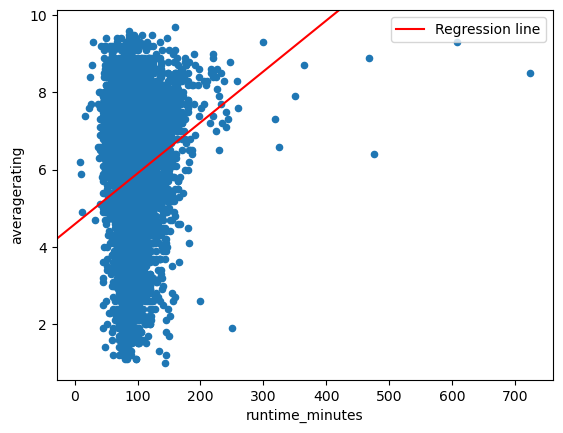

In [725]:
fig, ax = plt.subplots()
imdbdf.plot.scatter(x='runtime_minutes', y='averagerating', ax=ax)
sm.graphics.abline_plot(model_results=model_runtime, label="Regression line", ax=ax, color='red')
ax.legend()

<Axes: xlabel='runtime_minutes', ylabel='averagerating'>

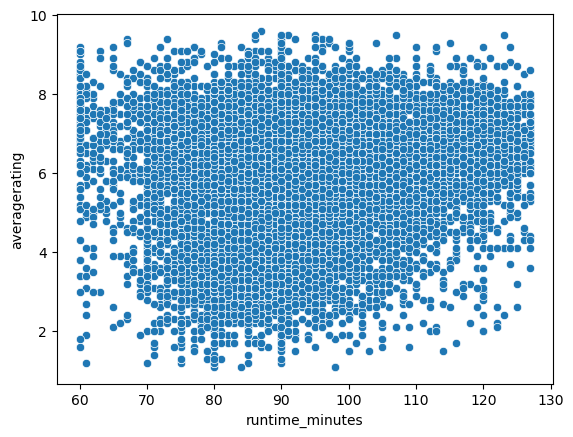

In [720]:
#remove runtime_minutes outliers and plot
imdbdf_runtime = imdbdf
lower = imdbdf_runtime['runtime_minutes'].quantile(0.25) - 1.5 * (imdbdf_runtime['runtime_minutes'].quantile(0.75) - imdbdf_runtime['runtime_minutes'].quantile(0.25))
upper = imdbdf_runtime['runtime_minutes'].quantile(0.75) + 1.5 * (imdbdf_runtime['runtime_minutes'].quantile(0.75) - imdbdf_runtime['runtime_minutes'].quantile(0.25))
imdbdf_runtime = imdbdf_runtime[(imdbdf_runtime['runtime_minutes'] >= lower) & (imdbdf_runtime['runtime_minutes'] <= upper)]
sns.scatterplot(x='runtime_minutes', y='averagerating', data=imdbdf_runtime)

In [721]:
#rerun regression with without outliers
endog = imdbdf_runtime['averagerating']
exog = sm.add_constant(imdbdf_runtime['runtime_minutes'])
model_runtime_two = sm.OLS(endog, exog).fit()
model_runtime_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          averagerating   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     512.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          8.22e-112
Time:                        10:02:29   Log-Likelihood:                -31055.
No. Observations:               17728   AIC:                         6.211e+04
Df Residuals:                   17726   BIC:                         6.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.9872      0.080     49.982      0.000       3.831       4.144
runtime_minutes     0.0192      0.001     22.631      0.000       0.018       0.021
==============================================================================
Omnibus:                      289.165   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.695
Skew:                          -0.318   Prob(JB):                     1.86e-66
Kurtosis:                       2.927   Cond. No.                         717.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

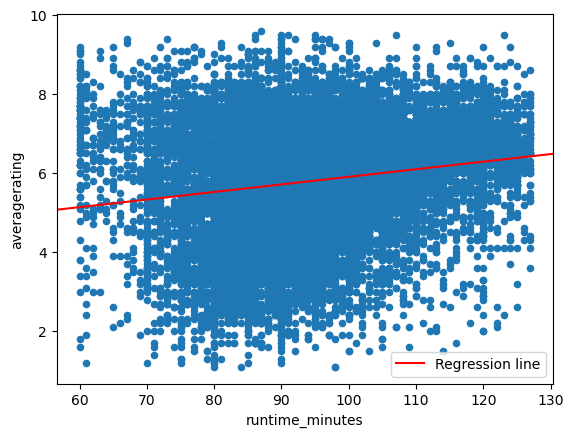

In [726]:
#plot runtime without outliers
fig, ax = plt.subplots()
imdbdf_runtime.plot.scatter(x='runtime_minutes', y='averagerating', ax=ax)
sm.graphics.abline_plot(model_results=model_runtime_two, label="Regression line", ax=ax, color='red')
ax.legend()